Support Vector Regressor Implementation

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.84608945,  1.10489793],
       [-0.38514137, -0.24022107],
       [ 1.23108721, -0.02067558],
       ...,
       [-0.61026337,  0.41234433],
       [ 0.07703717, -0.43961792],
       [ 1.73072511,  0.30993522]])

In [5]:
y

array([ 1.14980053e+02, -3.28613519e+01,  5.27278717e+01, -2.74731059e+01,
        9.70201672e+00, -1.27831208e+02,  5.74671174e+01,  1.85771178e+01,
        4.83470657e+01, -4.65358606e+01,  6.23375823e+01, -6.70870870e+01,
        3.07270438e+01, -1.24264827e+02, -7.77123874e+00,  4.50585830e+01,
       -2.70022612e+01,  1.84504381e+02, -1.17778360e+02, -3.60783286e+00,
        1.09504802e+02, -5.10473920e+01, -1.54203353e+02, -6.47375420e+00,
        9.05613123e+01,  1.51770482e+01, -1.43868497e+02,  1.19566275e+02,
       -5.66399636e+01, -6.24990112e+01,  3.69282266e+01, -1.17581546e+02,
        1.33789300e+01, -2.60132039e+01,  3.72493757e+00, -4.10310041e+01,
       -6.07745027e+01, -1.31596966e+02,  5.95344019e+01, -1.14233550e+02,
       -2.15006363e+02, -2.66705295e+01,  6.86265630e+00, -1.08003591e+02,
        6.17897331e+01,  5.14277022e+01,  6.62076377e+01,  1.12121675e+01,
       -1.32973557e+02, -3.41724724e+01,  1.59844033e+02,  6.91451324e+01,
       -4.17781156e+01, -

In [6]:
pd.DataFrame(X)[0]

0      0.846089
1     -0.385141
2      1.231087
3      0.955696
4      1.859485
         ...   
995    0.834792
996   -0.998138
997   -0.610263
998    0.077037
999    1.730725
Name: 0, Length: 1000, dtype: float64

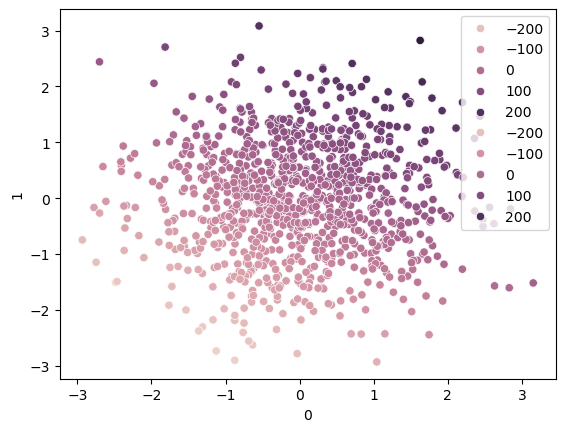

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)
plt.show()

In [9]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[44.28293743, 71.44035487]])

In [14]:
## Prediction
y_pred=svr.predict(X_test)

In [15]:
y_pred

array([ 107.57478424,  -24.54573332,   35.25133897,   -5.6620307 ,
        -33.18574174,  219.85457958,   37.31442094,  129.82925678,
        -63.18776695,  -82.40700325,   -7.28258334,   81.76432498,
        -54.9354643 ,   49.43807088,   73.87714908, -132.60211134,
         -0.85811826,   26.73223966,   28.60563656,  -23.2406637 ,
        -23.37586603, -138.92979887,  -48.09654595,   72.13275936,
          3.33054847,  -30.2656751 ,  -29.25467909,   32.85448231,
       -126.36740078,   -2.07270426,  -54.68108131,   29.05286077,
         61.52641445,  -36.32189028, -129.05200551,   86.7134236 ,
         25.2871703 ,  100.02472219, -192.98033623,  -38.50011494,
         79.27396469,   91.04024063, -132.22677683, -112.06646663,
         34.37361902,  -18.91885654, -105.43371475,  -53.2421643 ,
         76.62924375,   18.87382421,  123.32380413,   12.32855418,
          0.30260068,   19.84103331,  -23.83532073, -115.97306609,
        -10.05790167, -169.13927261,   -1.18586078, -154.88435

In [16]:
from sklearn.metrics import r2_score

In [17]:
print(r2_score(y_test,y_pred))

0.9986141795832899


## Hyperparametere Tuning With SVR

In [18]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [19]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.808 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.796 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.793 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.803 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.807 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.808 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.796 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.793 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.803 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.807 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [22]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9985908104433084
